### Market Sales Analysis2

1. Business Understanding – Define the problem, goals, and key questions.

2. Data Collection – Gather relevant data from databases, APIs, or files.

3. Data Cleaning & Preparation – Handle missing values, duplicates, outliers, and format inconsistencies.

4. Exploratory Data Analysis (EDA) – Summarize data, check distributions, correlations, and trends.

5. Data Visualization – Create charts/dashboards to communicate insights effectively.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Business Understanding – Define the problem, goals, and key questions.

- What is the most popular payment method in each branch?

- Which gender spends more on average per transaction?

- Do customers using a specific payment method spend more?

- Is the use of digital payments (Ewallet) related to higher customer ratings?

- Does customer type (Member vs Normal) affect spending behavior?

- Do male and female customers differ in product line preferences?

- Which city has the highest number of members?

- What is the most popular payment method in each branch? (duplicate of Q1)

- What is the relationship between quantity sold and total revenue — do larger quantities always mean higher sales?

- Are there seasonal peaks in sales (e.g., specific dates or times)?

- Is there a relationship between customer ratings and total spending?

- Which product lines perform poorly in sales but have high customer ratings (or vice versa)?



---



### Data Collection – Gather relevant data from databases, APIs, or files.

In [ ]:
df = pd.read_excel('supermarket_sales.xlsx')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Data Cleaning & Preparation – Handle missing values, duplicates, outliers, and format inconsistencies.

In [ ]:
colls = ['InvoiceID', 'Branch', 'City', 'Customers', 'Gender', 'ProductLine', 'UnitPice',
         'Quantity', 'Tax', 'Total', 'Date', 'Time', 'Payment', 'Corgs', 'GrosPer', 'GrosIncome', 'Rating']
df.columns = colls

df['Total'] = round(df['Total'], 2)
df['GrosPer'] = round(df['GrosPer'], 2)
df['GrosIncome'] = round(df['GrosIncome'], 2)
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.time

df.head(2)

,InvoiceID,Branch,City,Customers,Gender,ProductLine,UnitPice,Quantity,Tax,Total,Date,Time,Payment,Corgs,GrosPer,GrosIncome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,2019-01-05,13:08:00,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,2019-03-08,10:29:00,Cash,76.40,4.76,3.82,9.6


## Data Visualization + Exploratory Data Analysis

Understand the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceID    1000 non-null   object        
 1   Branch       1000 non-null   object        
 2   City         1000 non-null   object        
 3   Customers    1000 non-null   object        
 4   Gender       1000 non-null   object        
 5   ProductLine  1000 non-null   object        
 6   UnitPice     1000 non-null   float64       
 7   Quantity     1000 non-null   int64         
 8   Tax          1000 non-null   float64       
 9   Total        1000 non-null   float64       
 10  Date         1000 non-null   datetime64[ns]
 11  Time         1000 non-null   object        
 12  Payment      1000 non-null   object        
 13  Corgs        1000 non-null   float64       
 14  GrosPer      1000 non-null   float64       
 15  GrosIncome   1000 non-null   float64       
 16  Rating 

In [ ]:
df.describe()

,UnitPice,Quantity,Tax,Total,Date,Corgs,GrosPer,GrosIncome,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966820,2019-02-14 00:05:45.600000,307.58738,4.760000e+00,15.379510,6.97270
min,10.080000,1.000000,0.508500,10.680000,2019-01-01 00:00:00,10.17000,4.760000e+00,0.510000,4.00000
25%,32.875000,3.000000,5.924875,124.425000,2019-01-24 00:00:00,118.49750,4.760000e+00,5.927500,5.50000
50%,55.230000,5.000000,12.088000,253.850000,2019-02-13 00:00:00,241.76000,4.760000e+00,12.090000,7.00000
75%,77.935000,8.000000,22.445250,471.350000,2019-03-08 00:00:00,448.90500,4.760000e+00,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.760000e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885398,NaN,234.17651,1.208527e-13,11.708842,1.71858




---



- What is the most popular payment method in each branch?

In [ ]:
df.groupby(['Branch'])['Payment'].count()

,Payment
Branch,
A,340
B,332
C,328


In [ ]:
branch = df[['Branch', 'Payment']].value_counts().sort_index()
branch

Branch  Payment    
A       Cash           110
        Credit card    104
        Ewallet        126
B       Cash           110
        Credit card    109
        Ewallet        113
C       Cash           124
        Credit card     98
        Ewallet        106
Name: count, dtype: int64

In [ ]:
#brach A = a
a = df.loc[df['Branch'] == 'A', 'Payment'].value_counts()
a = a[a == a.max()]

b = df.loc[df['Branch'] == 'B', 'Payment'].value_counts()
b = b[b == b.max()]

c = df.loc[df['Branch'] == 'C', 'Payment'].value_counts()
c = c[c == c.max()]
c

,count
Payment,
Cash,124


**Visualization**

In [ ]:
%matplotlib inline

In [ ]:
pd.concat([a, b, c])

<Axes: xlabel='Payment'>

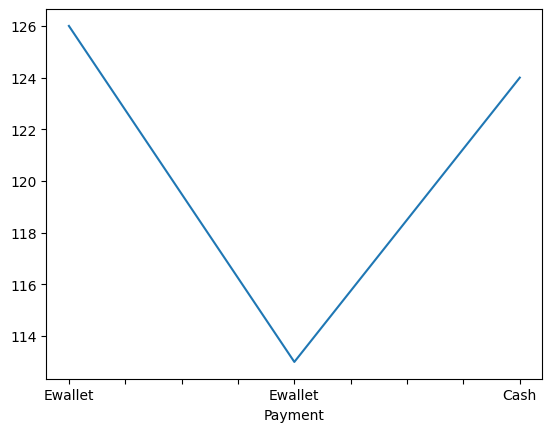

In [ ]:
pd.concat([a, b, c]).plot(kind = 'line')



---



- Which gender spends more on average per transaction?


In [ ]:
df['TransAc'] = df['UnitPice'] * df['Quantity']
df['TransAc']

,TransAc
0,522.83
1,76.40
2,324.31
3,465.76
4,604.17
...,...
995,40.35
996,973.80
997,31.84
998,65.82


In [ ]:
df.groupby('Gender')['TransAc'].mean().round(2)

,TransAc
Gender,
Female,319.14
Male,295.99


**Visualization**

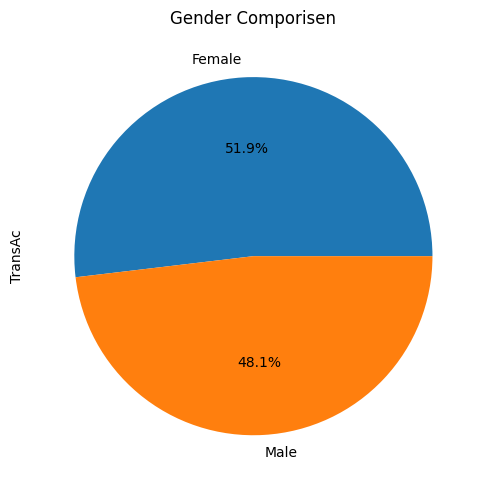

In [ ]:
df.groupby('Gender')['TransAc'].mean().round(2).plot(kind = 'pie', autopct = '%1.1f%%',
                                                     title = 'Gender Comporisen', figsize = (5, 5))
plt.tight_layout()



---



- Do customers using a specific payment method spend more?


In [ ]:
df[['Customers', 'Payment']].value_counts()

Customers  Payment    
Normal     Ewallet        184
           Cash           176
Member     Credit card    172
           Cash           168
           Ewallet        161
Normal     Credit card    139
Name: count, dtype: int64

In [ ]:
df2 = df.groupby('Payment')['Total'].sum()
df2

,Total
Payment,
Cash,112206.58
Credit card,100767.08
Ewallet,109993.16


In [ ]:

normal = df.loc[df['Customers'] == 'Normal', 'Payment'].value_counts()[df.loc[df['Customers'] == 'Normal', 'Payment']
.value_counts() == df.loc[df['Customers'] == 'Normal', 'Payment']
.value_counts().max()]

member = df.loc[df['Customers'] == 'Member', 'Payment'].value_counts()[df.loc[df['Customers'] == 'Member', 'Payment']
.value_counts() == df.loc[df['Customers'] == 'Member', 'Payment']
.value_counts().max()]

print(normal, member)

Payment
Ewallet    184
Name: count, dtype: int64 Payment
Credit card    172
Name: count, dtype: int64


In [ ]:
# customer members = cm
cm_df = df[df['Customers'] == 'Member']
cm_df = cm_df.groupby(['Customers', 'Payment'])['Total'].sum()
cm_df = cm_df[cm_df == cm_df.max()]
cm_df

,,Total
Customers,Payment,
Member,Credit card,57771.5


In [ ]:
# customer normal = cn
cn_df = df[df['Customers'] == 'Normal']
cn_df = cn_df.groupby(['Customers', 'Payment'])['Total'].sum()
cn_df = cn_df[cn_df == cn_df.max()]
cn_df

,,Total
Customers,Payment,
Normal,Ewallet,58202.18


In [ ]:
print(f'**Normal Customers**\n\n**Mostly Paying Method:::::::::\n{normal}\n\n**Most Money Spend:::::::::\n{cn_df}')

**Normal Customers**

**Mostly Paying Method:::::::::
Payment
Ewallet    184
Name: count, dtype: int64

**Most Money Spend:::::::::
Customers  Payment
Normal     Ewallet    58202.18
Name: Total, dtype: float64


In [ ]:
print(f'**Normal Customers**\n\n**Mostly Paying Method:::::::::\n{member}\n\n**Most Money Spend:::::::::\n{cm_df}')


**Normal Customers**

**Mostly Paying Method:::::::::
Payment
Credit card    172
Name: count, dtype: int64

**Most Money Spend:::::::::
Customers  Payment    
Member     Credit card    57771.5
Name: Total, dtype: float64


**Visualization**

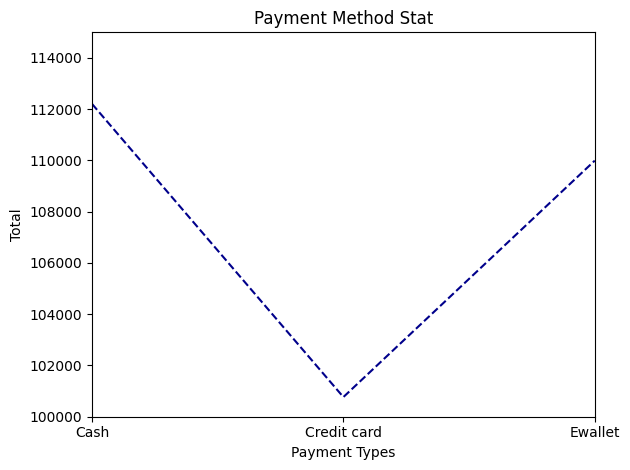

In [ ]:
plt.plot(df2, color = 'darkblue', linestyle = '--')
plt.axis([0, 2, 100000, 115000])
plt.title('Payment Method Stat')
plt.xlabel('Payment Types')
plt.ylabel('Total')
plt.tight_layout()
plt.show()



---



### Is the use of digital payments (Ewallet) related to higher customer ratings?

All three types of payment customer have monotonous rating, the differnece between them is unotisable

In [ ]:
pay = df[df['Payment'] == 'Ewallet']
pay = pay.groupby('Payment')['Rating'].mean()

In [ ]:
creadit = df[df['Payment'] == 'Credit card']
creadit = creadit.groupby('Payment')['Rating'].mean()

In [ ]:
cash = df[df['Payment'] == 'Cash']
cash = cash.groupby('Payment')['Rating'].mean()

In [ ]:
df3 = pd.concat([creadit, cash, pay])
df3


,Rating
Payment,
Credit card,7.003215
Cash,6.970058
Ewallet,6.947826


**Visualization**

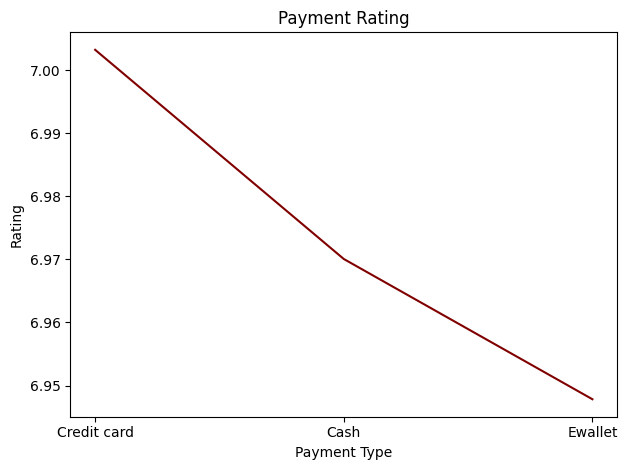

In [ ]:
plt.plot(df3, color = 'maroon')
plt.title('Payment Rating')
plt.xlabel('Payment Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()



---



### Does customer type (Member vs Normal) affect spending behavior?

Member in both sum and mean has higher compared to Normal

In [ ]:
sum_cus = df.groupby('Customers')['Total'].sum()
sum_cus

,Total
Customers,
Member,164223.52
Normal,158743.30


In [ ]:
mean_cus = df.groupby('Customers')['Total'].mean().round(2)
mean_cus

,Total
Customers,
Member,327.79
Normal,318.12


**Visualization**

In [307]:
import matplotlib.ticker as mt

In [319]:
fig = plt.figure(figsize = (8, 6), layout = 'constrained')
gridspec = fig.add_gridspec(nrows = 2, ncols = 2, height_ratios = [1, 2])

<Figure size 800x600 with 0 Axes>

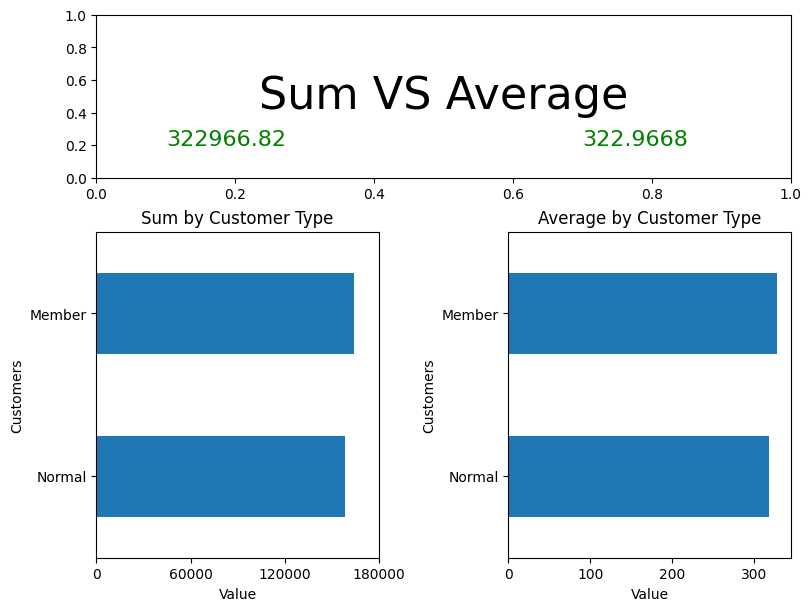

In [320]:

kpi = fig.add_subplot(gridspec[0, :])
sum = fig.add_subplot(gridspec[1, :1])
mean = fig.add_subplot(gridspec[1, 1:])

kpi.text(0.5, 0.5, 'Sum VS Average', ha = 'center', va = 'center', fontsize = 32, color = 'black')
kpi.text(0.1, 0.2, f"{df['Total'].sum().round(2)}", fontsize = 16, color = 'green')
kpi.text(0.7, 0.2, f"{df['Total'].mean().round(4)}", fontsize = 16, color = 'green')

# plot for sum
sum_cus.plot(kind = 'barh', ax = sum)
sum.invert_yaxis()
sum.set_title('Sum by Customer Type')
sum.set_xlabel('Value')
sum.set_xlim([0, 180000])
sum.xaxis.set_major_locator(mt.MultipleLocator(60000))

# plot for mean
mean_cus.plot(kind = 'barh', ax = mean)
mean.invert_yaxis()
mean.set_title('Average by Customer Type')
mean.set_xlabel('Value')



fig



---



### Do male and female customers differ in product line preferences?

In [ ]:
df[['Gender', 'ProductLine']].value_counts().sort_index()

Gender  ProductLine           
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Comparison: Product Line')

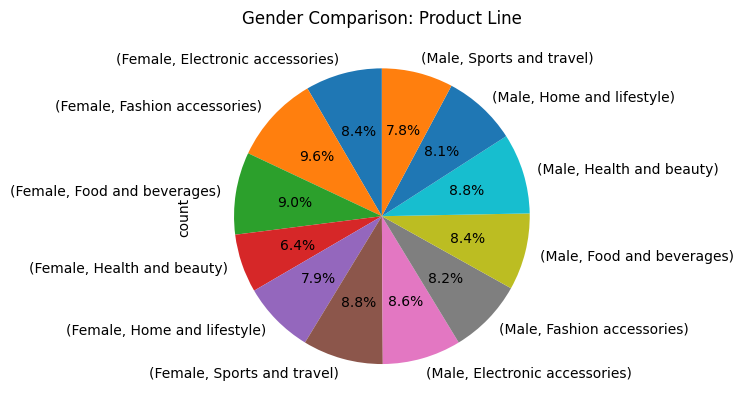

In [326]:
df[['Gender', 'ProductLine']].value_counts().sort_index().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.title('Gender Comparison: Product Line')



---



### Which city has the highest number of members?

In [ ]:
df.head(1)

,InvoiceID,Branch,City,Customers,Gender,ProductLine,UnitPice,Quantity,Tax,Total,Date,Time,Payment,Corgs,GrosPer,GrosIncome,Rating,TransAc
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,2019-01-05,13:08:00,Ewallet,522.83,4.76,26.14,9.1,522.83


In [ ]:
df.groupby('City')['Customers'].count()

,Customers
City,
Mandalay,332
Naypyitaw,328
Yangon,340


In [ ]:
city_customers = df.groupby('City')['Customers'].count()[df.groupby('City')['Customers'].count() == df.groupby('City')['Customers'].count().max()]
city_customers

,Customers
City,
Yangon,340


In [ ]:
print(f'Maximum Number of Customers is in {city_customers}')

Maximum Number of Customers is in City
Yangon    340
Name: Customers, dtype: int64


**Visualization**

In [356]:
fig1 = plt.figure(figsize = (8, 6), layout = 'constrained')

gridspec = fig1.add_gridspec(nrows = 2, ncols = 2, height_ratios = [1, 2])

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

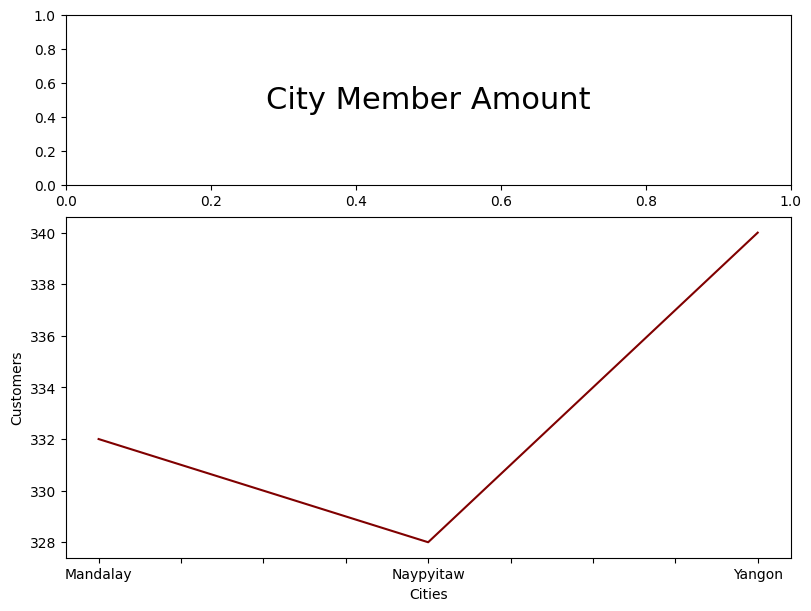

<Figure size 640x480 with 0 Axes>

In [357]:
kpi = fig1.add_subplot(gridspec[0, :])
kpi.text(0.5, 0.5, 'City Member Amount', ha = 'center', va = 'center', fontsize = 22, color = 'black')

city = fig1.add_subplot(gridspec[1, :])
df.groupby('City')['Customers'].count().plot(kind = 'line', color = 'maroon', linestyle = '-', ax = city)
plt.tight_layout()
plt.show()
plt.tight_layout()
city.set_xlabel('Cities')
city.set_ylabel('Customers')
fig1



---

